<style>
  .summary-container {
    background: #1a1a2e;
    color: #eaeaea;
    padding: 25px;
    border-radius: 12px;
    font-family: Arial, sans-serif;
    line-height: 1.6;
  }
  .summary-title {
    background: #16213e;
    color: #fff;
    padding: 10px;
    border-radius: 8px;
    font-size: 22px;
    font-weight: bold;
    text-align: center;
    margin-bottom: 12px;
  }
  .summary-section {
    background: #0f3460;
    padding: 12px;
    border-radius: 6px;
    margin: 10px 0;
    font-size: 16px;
  }
  .summary-section h3 {
    color: #ffd700;
    margin-top: 0;
  }
  .code-block {
    background: #121212;
    padding: 10px;
    border-radius: 6px;
    font-family: Consolas, monospace;
    color: #00ff9d;
    overflow-x: auto;
  }
</style>

<div class="summary-container">
  <div class="summary-title">YOLOv8 Brain MRI Summary</div>

  <div class="summary-section">
    <h3>Dataset</h3>
    MRI dataset has two classes: <strong>yes</strong> and <strong>no</strong>.
  </div>

  <div class="summary-section">
    <h3>Training Steps</h3>
    Copy to /kaggle/working, install YOLO, train classification model.
  </div>

  <div class="summary-section">
    <h3>Confusion Matrix</h3>
    Used to evaluate classification performance:<br>
    - TP, FP, TN, FN explained and metrics calculated.
  </div>

  <div class="summary-section">
    <h3>Example Commands</h3>
    <div class="code-block">
      !pip install -q ultralytics<br>
      model = YOLO("yolov8n-cls.pt")<br>
      model.train(data=DST, epochs=30, imgsz=224)
    </div>
  </div>
</div>


In [1]:
!pip install -q ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00


In [2]:
import os
import re
import time
import shutil
import numpy as np 
import pandas as pd
from ultralytics import YOLO
print ('Yolo installed')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Yolo installed


In [3]:
os.listdir("/kaggle/input")

['brain-mri-images-for-brain-tumor-detection']

In [4]:
os.listdir("/kaggle/input/brain-mri-images-for-brain-tumor-detection")


['no', 'yes', 'brain_tumor_dataset']

In [5]:
SRC = "/kaggle/input/brain-mri-images-for-brain-tumor-detection"

DST = "/kaggle/working/brain_dataset"
shutil.copytree(SRC, DST)

'/kaggle/working/brain_dataset'

In [6]:
model = YOLO("yolov8n-cls.pt")

In [7]:
model.train(
    data=DST,
    epochs=30,
    imgsz=224,
    batch=32
)

Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/brain_dataset, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd5400eef00>
curves: []
curves_results: []
fitness: 0.9607843160629272
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9215686321258545, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9607843160629272}
save_dir: PosixPath('/kaggle/working/runs/classify/train')
speed: {'preprocess': 0.05952029411782949, 'inference': 0.19806249019614938, 'loss': 0.0002081372550563566, 'postprocess': 0.0003181372548232164}
task: 'classify'
top1: 0.9215686321258545
top5: 1.0

## Quick Checklist
| Item              | Status               |
| ----------------- | -------------------- |
| Dataset type      | Classification ✔️    |
| YOLO mode         | yolov8-cls ✔️        |
| Train/val folders | Auto-created ✔️      |
| Writable path     | `/kaggle/working` ✔️ |
| Error cause       | Wrong SRC path ✔️    |


In [8]:
metrics = model.val()


Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,438,723 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=train' not found at /kaggle/working/brain_dataset/train
Found 346 images in subdirectories. Attempting to split...
Splitting /kaggle/working/brain_dataset (3 classes, 253 images) into 80% train, 20% val...
Split complete in /kaggle/working/brain_dataset_split ✅
ERROR ❌ train: /kaggle/working/brain_dataset_split/train... found 250 images in 2 classes (requires 3 classes, not 2)
ERROR ❌ val: /kaggle/working/brain_dataset_split/val... found 121 images in 2 classes (requires 3 classes, not 2)
test: None...
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 414.2±606.6 MB/s, size: 20.0 KB)
val: Scanning /kaggle/working/brain_dataset_split/val... 121 images, 0 corrupt: 100% ━━━━━━━━━━━━ 121/121 2.4Kit/s 0.0s
val: New cache created: /kaggle/working/brain_dataset_split/val.cache
               classes  

In [9]:
results = model.predict(
    source="/kaggle/working/brain_dataset_split/val/yes",
    batch=16
)



image 1/74 /kaggle/working/brain_dataset_split/val/yes/Y1.jpg: 224x224 yes 1.00, no 0.00, brain_tumor_dataset 0.00, 0.4ms
image 2/74 /kaggle/working/brain_dataset_split/val/yes/Y100.JPG: 224x224 yes 1.00, no 0.00, brain_tumor_dataset 0.00, 0.4ms
image 3/74 /kaggle/working/brain_dataset_split/val/yes/Y102.jpg: 224x224 yes 1.00, no 0.00, brain_tumor_dataset 0.00, 0.4ms
image 4/74 /kaggle/working/brain_dataset_split/val/yes/Y104.jpg: 224x224 yes 1.00, no 0.00, brain_tumor_dataset 0.00, 0.4ms
image 5/74 /kaggle/working/brain_dataset_split/val/yes/Y106.jpg: 224x224 yes 1.00, no 0.00, brain_tumor_dataset 0.00, 0.4ms
image 6/74 /kaggle/working/brain_dataset_split/val/yes/Y11.jpg: 224x224 yes 1.00, no 0.00, brain_tumor_dataset 0.00, 0.4ms
image 7/74 /kaggle/working/brain_dataset_split/val/yes/Y112.JPG: 224x224 yes 1.00, no 0.00, brain_tumor_dataset 0.00, 0.4ms
image 8/74 /kaggle/working/brain_dataset_split/val/yes/Y114.JPG: 224x224 yes 0.97, no 0.03, brain_tumor_dataset 0.00, 0.4ms
image 9/74

## Plot Confusion Matrix

In [10]:
for root, dirs, files in os.walk("/kaggle/working"):
    print(root)
    break

/kaggle/working


In [11]:
for root, dirs, files in os.walk("/kaggle/working"):
    if "split" in root:
        print(root)

/kaggle/working/brain_dataset_split
/kaggle/working/brain_dataset_split/val
/kaggle/working/brain_dataset_split/val/no
/kaggle/working/brain_dataset_split/val/yes
/kaggle/working/brain_dataset_split/val/brain_tumor_dataset
/kaggle/working/brain_dataset_split/train
/kaggle/working/brain_dataset_split/train/no
/kaggle/working/brain_dataset_split/train/yes
/kaggle/working/brain_dataset_split/train/brain_tumor_dataset


In [12]:
VAL_DIR = "/kaggle/working/brain_dataset_split/val"


In [13]:
class_names = os.listdir(VAL_DIR)
print(class_names)  # ['yes', 'no']

['no', 'yes', 'brain_tumor_dataset']


In [14]:
VAL_DIR = "/kaggle/working/brain_dataset_split/val"

class_names = [
    d for d in os.listdir(VAL_DIR)
    if os.path.isdir(os.path.join(VAL_DIR, d))
    and d in ["yes", "no"]   # explicit filtering
]

print(class_names)

['no', 'yes']


In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


y_true = []
y_pred = []

for cls in class_names:
    cls_path = os.path.join(VAL_DIR, cls)

    results = model.predict(
        source=cls_path,
        verbose=False
    )

    for r in results:
        pred_class = r.names[r.probs.top1]
        y_pred.append(pred_class)
        y_true.append(cls)

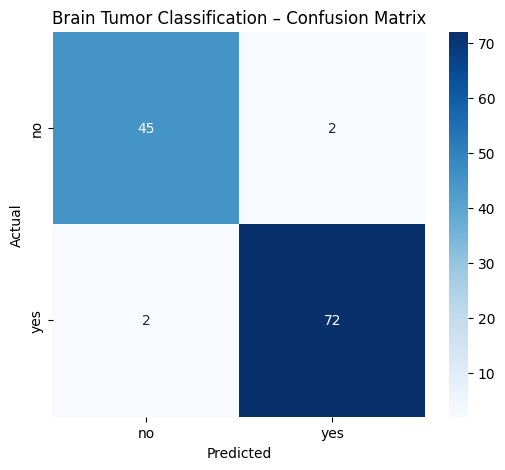

In [16]:
import seaborn as sns 
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Brain Tumor Classification – Confusion Matrix")
plt.show()

## 🧠 Confusion Matrix
| Term               | Meaning (Medical Context)          |
| ------------------ | ---------------------------------- |
| **TP (Yes → Yes)** | Tumor correctly detected           |
| **TN (No → No)**   | Healthy brain correctly identified |
| **FP (No → Yes)**  | False alarm (dangerous)            |
| **FN (Yes → No)**  | Missed tumor ❗ (most critical)     |


## Binary Report (Tumor / No Tumor)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(
    y_true,
    y_pred,
    target_names=class_names
))

              precision    recall  f1-score   support

          no       0.96      0.96      0.96        47
         yes       0.97      0.97      0.97        74

    accuracy                           0.97       121
   macro avg       0.97      0.97      0.97       121
weighted avg       0.97      0.97      0.97       121



In [18]:
model = YOLO("runs/classify/train/weights/best.pt")
model.save("brain_tumor_classifier.pt")